# **CVPS20 // Convolutional Neural Networks with TF/Keras: 3-color images**

*November 5, 2020*

This notebook will continue introducing the Tensorflow/Keras framework for constructing and training CNNs using 3-color images. 

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

In [2]:
plt.style.use("seaborn-dark")
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gist_gray"

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---

#### **Load the Data and Create Training/Testing Sets**

In [4]:
# -- load data in RGB
ellip = np.load("/content/drive/My Drive/cvps20/data/galaxy_zoo/galaxy_zoo_elliptical.npy") / 255.
spiral = np.load("/content/drive/My Drive/cvps20/data/galaxy_zoo/galaxy_zoo_spiral.npy") / 255.

In [5]:
# -- concatenate
gals = np.concatenate((ellip, spiral), axis=0)

In [6]:
def conf_matrix_plot(cmat):
  """ Visulize a confusion matrix. """

  # -- initialize the plot
  fig, ax = plt.subplots()

  # -- show the confusion matrix
  im = ax.imshow(cmat, cmap="viridis")

  # -- set the tick labels
  ax.set_xticks(range(2))
  ax.set_yticks(range(2))
  ax.set_xticklabels(["ellip", "spiral"])
  ax.set_yticklabels(["ellip", "spiral"])

  # -- label the axes
  ax.set_ylabel("true label")
  ax.set_xlabel("predicted label")

  # -- print the number in each cell
  for ii in range(2):
    for jj in range(2):
      ax.text(jj, ii, cmat[ii, jj], color="orangered", ha="center", va="center")

  # -- show the figure
  fig.show()

  return

---

...we can also use *color* information,

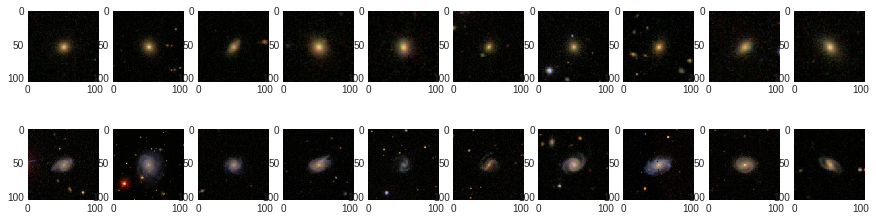

In [7]:
# -- plot the first 10 elliptical and spirals in RGB
fig, ax = plt.subplots(2, 10, figsize=[15, 4])
for ii in range(10):
  ax[0, ii].imshow(gals[ii])
for ii in range(10):
  ax[1, ii].imshow(gals[5000 + ii])
fig.show()

In [8]:
# -- create features arrays
feat = gals

# -- create the target
targ = np.concatenate((np.full(5000, 0), np.full(5000, 1)))

# -- generate a training/testing set
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat, targ, train_size=4000, test_size=1000, random_state=302)

In [9]:
feat_tr.shape

(4000, 106, 106, 3)

In [10]:
# -- define the layers
layer1 = keras.layers.Conv2D(32, (5, 5), activation="relu", input_shape=(106, 106, 3), kernel_regularizer=keras.regularizers.l2(0.01))
layer2 = keras.layers.MaxPool2D((2, 2))
layer3 = keras.layers.Conv2D(64, (5, 5), activation="relu", kernel_regularizer=keras.regularizers.l2(0.01))
layer4 = keras.layers.MaxPool2D((2, 2))
layer5 = keras.layers.Flatten()
layer6 = keras.layers.Dense(1024, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01))
layer7 = keras.layers.Dense(2, activation="softmax", kernel_regularizer=keras.regularizers.l2(0.01))

layers = [layer1, layer2, layer3, layer4, layer5, layer6, layer7]

# -- instantiate the model
model = keras.Sequential(layers)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# -- fit the model
history = model.fit(feat_tr, targ_tr, epochs=50, batch_size=100, validation_split=0.2, verbose=1)

# -- evaluate the training and testing accuracy
loss_tr, acc_tr = model.evaluate(feat_tr, targ_tr, batch_size=1, verbose=0)
loss_te, acc_te = model.evaluate(feat_te, targ_te, batch_size=1, verbose=0)

print("Training accuracy : {0:.4f}".format(acc_tr))
print("Testing accuracy  : {0:.4f}".format(acc_te))

Epoch 1/50
32/32 [==============================] - 9s 64ms/step - loss: 8.2005 - accuracy: 0.6008 - val_loss: 0.9029 - val_accuracy: 0.8438
Epoch 2/50
32/32 [==============================] - 2s 49ms/step - loss: 0.7734 - accuracy: 0.8514 - val_loss: 0.6368 - val_accuracy: 0.8662
Epoch 3/50
32/32 [==============================] - 2s 49ms/step - loss: 0.5899 - accuracy: 0.8585 - val_loss: 0.5161 - val_accuracy: 0.8700
Epoch 4/50
32/32 [==============================] - 2s 49ms/step - loss: 0.4961 - accuracy: 0.8884 - val_loss: 0.5064 - val_accuracy: 0.8700
Epoch 5/50
32/32 [==============================] - 2s 49ms/step - loss: 0.4737 - accuracy: 0.8850 - val_loss: 0.4276 - val_accuracy: 0.9000
Epoch 6/50
32/32 [==============================] - 2s 49ms/step - loss: 0.4313 - accuracy: 0.9046 - val_loss: 0.4519 - val_accuracy: 0.9125
Epoch 7/50
32/32 [==============================] - 2s 49ms/step - loss: 0.4265 - accuracy: 0.9093 - val_loss: 0.4216 - val_accuracy: 0.9300
Epoch 8/50
32

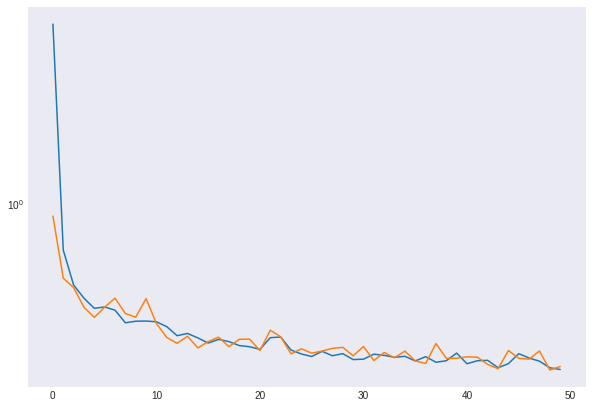

In [ ]:
# -- plot the loss function
fig, ax = plt.subplots()
ax.plot(history.history["loss"])
ax.plot(history.history["val_loss"])
ax.set_yscale("log")
fig.show()